  University Rank                     Name of University        Location  \
0               1                   University of Oxford  United Kingdom   
1               2                     Harvard University   United States   
2               3                University of Cambridge  United Kingdom   
3               3                    Stanford University   United States   
4               5  Massachusetts Institute of Technology   United States   

  No of student  No of student per staff International Student  \
0        20,965                     10.6                   42%   
1        21,887                      9.6                   25%   
2        20,185                     11.3                   39%   
3        16,164                      7.1                   24%   
4        11,415                      8.2                   33%   

  Female:Male Ratio OverAll Score  Teaching Score  Research Score  \
0           48 : 52          96.4            92.3            99.7   
1       

C:\Users\juanf\AppData\Local\Temp\ipykernel_14812\852741825.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
C:\Users\juanf\AppData\Local\Temp\ipykernel_14812\852741825.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

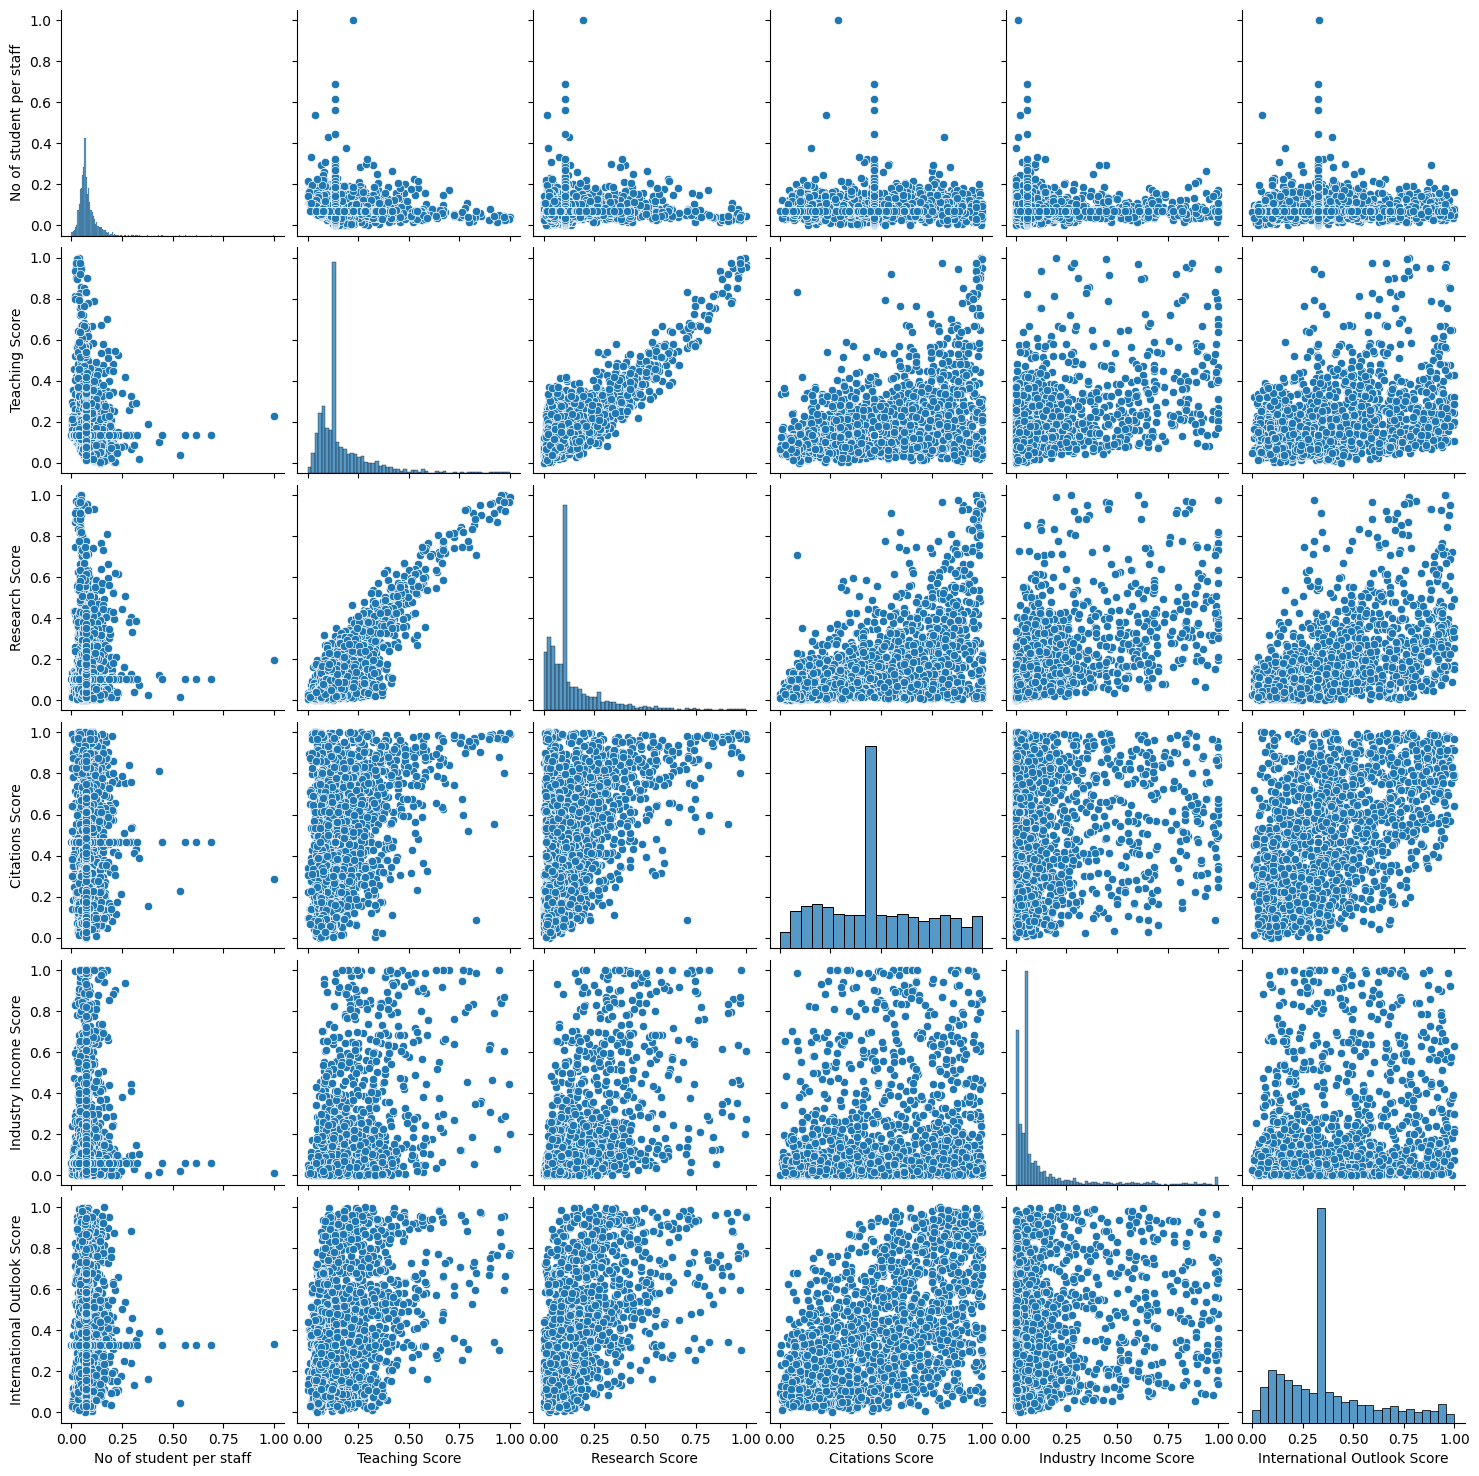

In [12]:
# /mnt/data/world_university_rankings_2023_preprocessing.ipynb

# Install necessary packages

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
df = pd.read_csv('./data/World University Rankings 2023.csv')

# Display the first few rows of the dataset
print(df.head())

# Print column names to diagnose KeyError
print("Column names:", df.columns.tolist())

# Step 1: Exploratory Data Analysis (EDA)
# --------------------------------------
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Data types and basic statistics
print("Data types:")
print(df.dtypes)
print("Basic statistics:")
print(df.describe(include='all'))

# Step 2: Data Cleaning
# ---------------------
# Drop duplicates
df = df.drop_duplicates()

# Handling missing values
# Example: Fill missing values with the median for numerical columns
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].median(), inplace=True)

# Fill missing values with mode for categorical columns
for column in df.select_dtypes(include='object').columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Correct data types if necessary
# Identify the correct column name if 'rank' doesn't exist
if 'rank' in df.columns:
    if df['rank'].dtype != 'int64':
        df['rank'] = df['rank'].astype('int64')
else:
    print("Column 'rank' not found. Available columns:", df.columns.tolist())

# Step 3: Feature Engineering
# ---------------------------
# Example: Create a new feature 'is_top_100' indicating if the university is in the top 100
if 'rank' in df.columns:
    df['is_top_100'] = df['rank'] <= 100

# Step 4: Normalization
# ---------------------
# Example: Normalize numerical features
scaler = MinMaxScaler()
numerical_features = df.select_dtypes(include=np.number).columns
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Alternatively, you can use StandardScaler for standardization
# standard_scaler = StandardScaler()
# df[numerical_features] = standard_scaler.fit_transform(df[numerical_features])

# Display the cleaned and processed data
print(df.head())

# Save the cleaned dataset to a new CSV file
df.to_csv('./data/World University Rankings 2023.csv', index=False)

# Visualize some features if needed
sns.pairplot(df, vars=numerical_features)
plt.show()
